<a href="https://colab.research.google.com/github/maricamolesi/Iniciacao-Cientifica/blob/master/Classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
"""
Created on Thu Nov 21 16:47:32 2019

@author: Mariana
"""

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import RepeatedKFold, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot

In [55]:
classifiers = []
classifiers.append(('LDA', LinearDiscriminantAnalysis()))
classifiers.append(('KNN', KNeighborsClassifier()))
classifiers.append(('CART', DecisionTreeClassifier()))
classifiers.append(('RF', RandomForestClassifier()))
classifiers.append(('NB', GaussianNB()))
classifiers.append(('SVM', SVC()))

In [50]:
#Vetor das classes
LABELS = np.loadtxt('/content/drive/My Drive/ProjetoIC/CITA/LABELS.txt')

**CLASSIFICAÇÃO DAS IMAGENS POUCO CORROÍDAS**

In [51]:
#Matriz de descritores extraídos pela rede neural
MATRIX_NEURALNETWORK = np.load('/content/drive/My Drive/ProjetoIC/CITA/FEATURES_POUCOCORROIDO.npy')

#Matriz de descritores extraídos pelo modelo de automâtos celulares
MATRIX_CITA = np.load('/content/drive/My Drive/ProjetoIC/CITA/CITA-POUCOCORROIDO.npy')


RESULTADOS DOS DESCRITORES CITA
LDA: 0.683575 (0.016152)
KNN: 0.295553 (0.027262)
CART: 0.290513 (0.031259)
RF: 0.347362 (0.037096)
NB: 0.210554 (0.032487)
SVM: 0.086165 (0.011945)


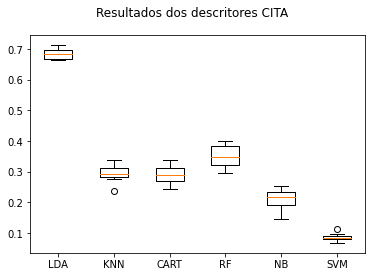

In [70]:
resultados = []
classificadores = []

print("RESULTADOS DOS DESCRITORES CITA")

for name, model in classifiers:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, MATRIX_CITA, LABELS, cv=kfold, scoring="accuracy")
    resultados.append(cv_results)
    classificadores.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot para comparar os resultados
fig = pyplot.figure()
fig.suptitle('Resultados dos descritores CITA')
ax = fig.add_subplot(111)
pyplot.boxplot(resultados)
ax.set_xticklabels(classificadores)
pyplot.show()

RESULTADO DOS DESCRITORES EXTRAÍDOS PELA REDE NEURAL
LDA: 0.988167 (0.006899)
KNN: 0.979147 (0.011033)
CART: 0.795594 (0.019017)
RF: 0.981410 (0.010733)
NB: 0.821485 (0.031872)
SVM: 0.985917 (0.007683)


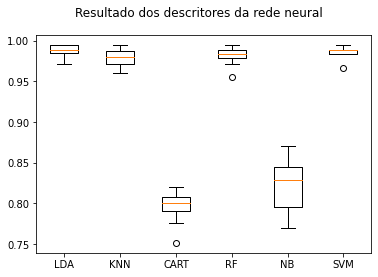

In [71]:
resultados = []
classificadores = []

print("RESULTADO DOS DESCRITORES EXTRAÍDOS PELA REDE NEURAL")

for name, model in classifiers:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, MATRIX_NEURALNETWORK, LABELS, cv=kfold, scoring="accuracy")
    resultados.append(cv_results)
    classificadores.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot para comparar os resultados
fig = pyplot.figure()
fig.suptitle('Resultado dos descritores da rede neural')
ax = fig.add_subplot(111)
pyplot.boxplot(resultados)
ax.set_xticklabels(classificadores)
pyplot.show()

**CLASSIFICAÇÃO DAS IMAGENS CORROÍDAS**

In [75]:
#Matriz de descritores extraídos pela rede neural
MATRIX_NEURALNETWORK = np.load('/content/drive/My Drive/ProjetoIC/CITA/FEATURES_CORROIDO.npy')

#Matriz de descritores extraídos pelo modelo de automâtos celulares
MATRIX_CITA = np.load('/content/drive/My Drive/ProjetoIC/CITA/CITA-CORROIDO.npy')

RESULTADO DOS DESCRITORES CITA
LDA: 0.911604 (0.023382)
KNN: 0.281508 (0.015077)
CART: 0.313029 (0.032095)
RF: 0.369352 (0.016909)
NB: 0.264051 (0.022802)
SVM: 0.078833 (0.011548)


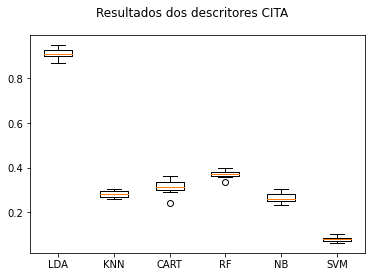

In [76]:
resultados = []
classificadores = []

print("RESULTADO DOS DESCRITORES CITA")

for name, model in classifiers:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, MATRIX_CITA, LABELS, cv=kfold, scoring="accuracy")
    resultados.append(cv_results)
    classificadores.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot para comparar os resultados
fig = pyplot.figure()
fig.suptitle('Resultados dos descritores CITA')
ax = fig.add_subplot(111)
pyplot.boxplot(resultados)
ax.set_xticklabels(classificadores)
pyplot.show()

RESULTADO DOS DESCRITORES EXTRAÍDOS PELA REDE NEURAL
LDA: 0.972402 (0.008162)
KNN: 0.952142 (0.012377)
CART: 0.726335 (0.027722)
RF: 0.962280 (0.009060)
NB: 0.787701 (0.030957)
SVM: 0.965086 (0.007050)


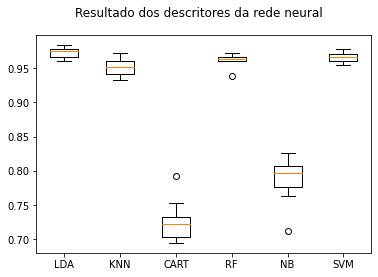

In [77]:
resultados = []
classificadores = []

print("RESULTADO DOS DESCRITORES EXTRAÍDOS PELA REDE NEURAL")

for name, model in classifiers:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, MATRIX_NEURALNETWORK, LABELS, cv=kfold, scoring="accuracy")
    resultados.append(cv_results)
    classificadores.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot para comparar os resultados
fig = pyplot.figure()
fig.suptitle('Resultado dos descritores da rede neural')
ax = fig.add_subplot(111)
pyplot.boxplot(resultados)
ax.set_xticklabels(classificadores)
pyplot.show()

**CLASSIFICAÇÃO DAS IMAGENS MUITO CORROÍDAS**

In [78]:
#Matriz de descritores extraídos pela rede neural
MATRIX_NEURALNETWORK = np.load('/content/drive/My Drive/ProjetoIC/CITA/FEATURES_MUITOCORROIDO.npy')

#Matriz de descritores extraídos pelo modelo de automâtos celulares
MATRIX_CITA = np.load('/content/drive/My Drive/ProjetoIC/CITA/CITA-MUITOCORROIDO.npy')

RESULTADO DOS DESCRITORES CITA
LDA: 0.923434 (0.015518)
KNN: 0.249445 (0.030222)
CART: 0.365419 (0.040725)
RF: 0.408798 (0.024909)
NB: 0.275319 (0.020707)
SVM: 0.074332 (0.013783)


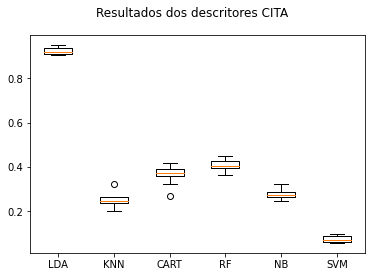

In [79]:
resultados = []
classificadores = []

print("RESULTADO DOS DESCRITORES CITA")

for name, model in classifiers:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, MATRIX_CITA, LABELS, cv=kfold, scoring="accuracy")
    resultados.append(cv_results)
    classificadores.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot para comparar os resultados
fig = pyplot.figure()
fig.suptitle('Resultados dos descritores CITA')
ax = fig.add_subplot(111)
pyplot.boxplot(resultados)
ax.set_xticklabels(classificadores)
pyplot.show()

RESULTADO DOS DESCRITORES EXTRAÍDOS PELA REDE NEURAL
LDA: 0.969031 (0.010134)
KNN: 0.938078 (0.012260)
CART: 0.739326 (0.028091)
RF: 0.953834 (0.012256)
NB: 0.697645 (0.027105)
SVM: 0.960023 (0.016005)


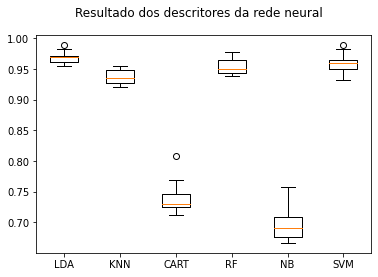

In [80]:
resultados = []
classificadores = []

print("RESULTADO DOS DESCRITORES EXTRAÍDOS PELA REDE NEURAL")

for name, model in classifiers:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, MATRIX_NEURALNETWORK, LABELS, cv=kfold, scoring="accuracy")
    resultados.append(cv_results)
    classificadores.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot para comparar os resultados
fig = pyplot.figure()
fig.suptitle('Resultado dos descritores da rede neural')
ax = fig.add_subplot(111)
pyplot.boxplot(resultados)
ax.set_xticklabels(classificadores)
pyplot.show()